In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


1. What is the distribution of age among heart failure patients in the dataset?

In [5]:
age_dist = data[data['DEATH_EVENT'] == 1]['age'].value_counts()
print(age_dist)

age
60.000    13
65.000     8
50.000     8
70.000     7
75.000     6
45.000     6
72.000     5
80.000     5
82.000     3
59.000     3
85.000     3
55.000     3
58.000     2
69.000     2
48.000     2
95.000     2
68.000     2
90.000     2
42.000     1
60.667     1
46.000     1
86.000     1
77.000     1
54.000     1
94.000     1
49.000     1
53.000     1
57.000     1
51.000     1
87.000     1
62.000     1
73.000     1
Name: count, dtype: int64


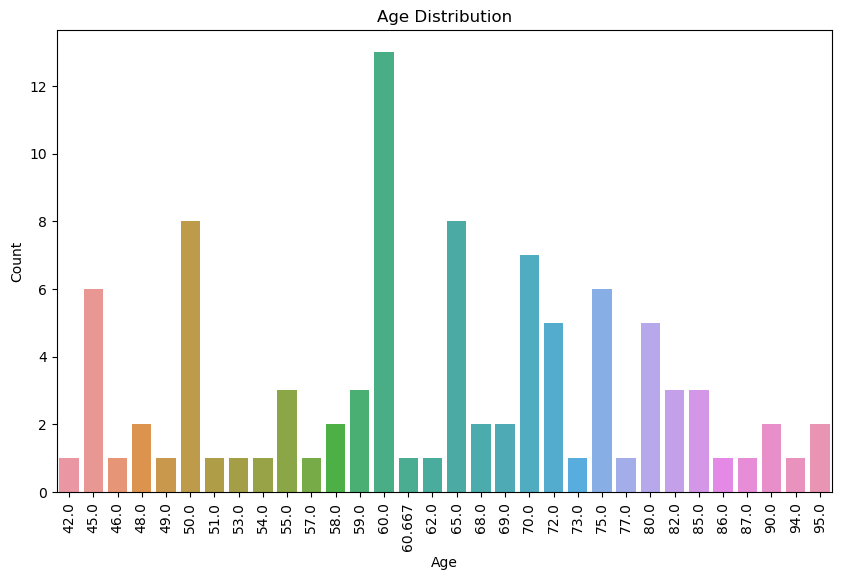

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_dist.index, y=age_dist.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Age Distribution')
plt.show()

* age 60 has the highest death rate

c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


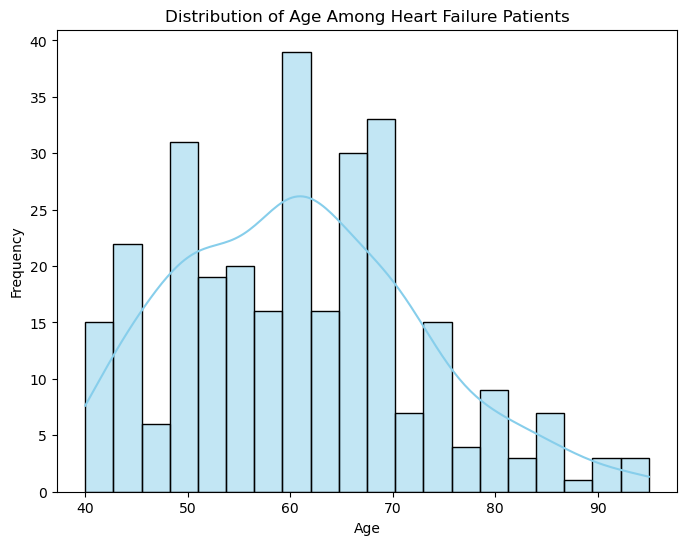

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.show()

----------
2. How does the death rate vary with age?

In [8]:
death_rate = data.groupby('age')['DEATH_EVENT'].mean()

c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RS\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


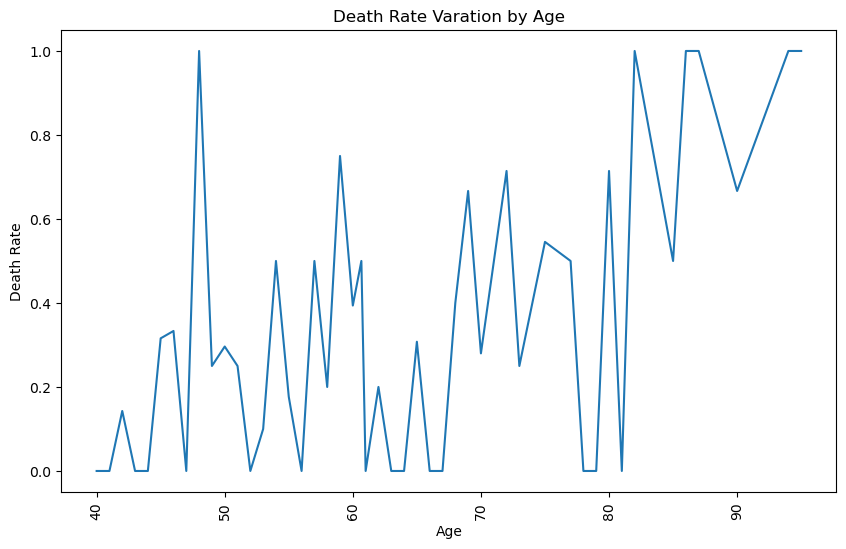

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=death_rate.index, y=death_rate.values)
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.title('Death Rate Varation by Age')
plt.xticks(rotation=90)
plt.show()

--------
3. What is the percentage of male and female patients in the dataset?

In [10]:
sex_dist = data['sex'].replace({0: 'Female', 1: 'Male'}).value_counts()

([<matplotlib.patches.Wedge at 0x286afb8fd50>,
 [Text(-0.4957819748741846, 0.9819369803555896, 'Male'),
  Text(0.495782066809757, -0.9819369339371271, 'Female')],
 [Text(-0.2704265317495552, 0.535601989284867, '64.9%'),
  Text(0.27042658189623103, -0.5356019639657056, '35.1%')])

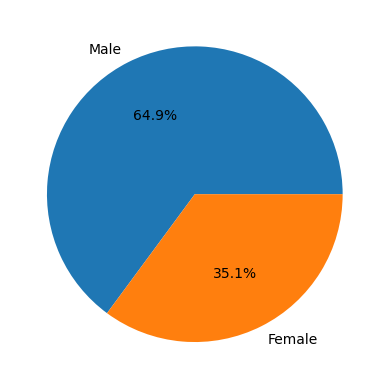

In [11]:
plt.pie(sex_dist, labels=sex_dist.index, autopct='%1.1f%%')

------
4. How does the platelet count vary among different age groups?

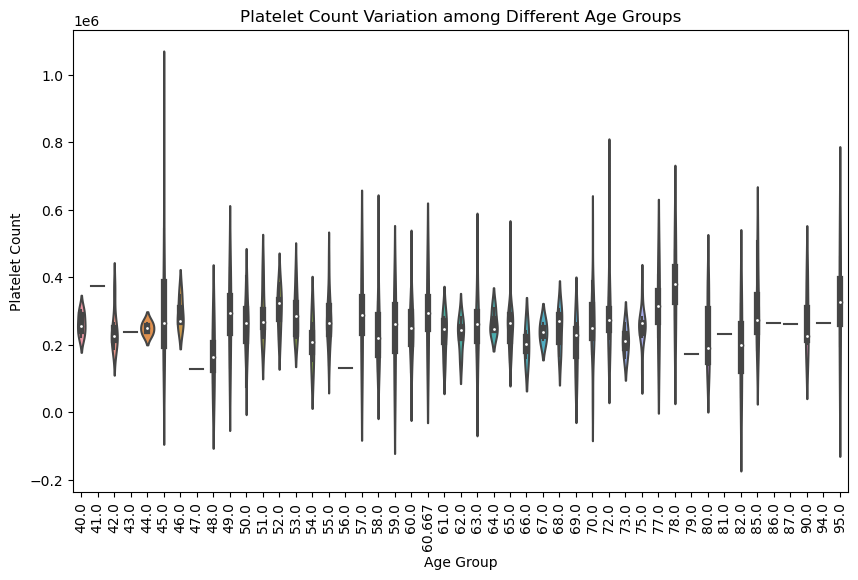

In [12]:
age_plateletes = data.groupby('age')['platelets'].describe()

plt.figure(figsize=(10, 6))
sns.violinplot(x='age', y='platelets', data=data)
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.title('Platelet Count Variation among Different Age Groups')
plt.xticks(rotation=90)
plt.show()

-----------
5. Is there a correlation between creatinine and sodium levels in the blood?

In [13]:
corr = data['creatinine_phosphokinase'].corr(data['serum_sodium'])
corr

0.059550155833725624

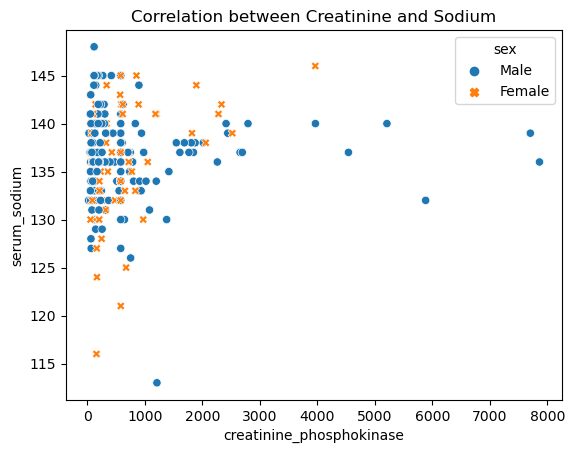

In [14]:
data['sex'] = data['sex'].replace({0: "Female", 1: "Male"})
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=data, hue='sex', style='sex')
plt.title('Correlation between Creatinine and Sodium')
plt.show()

-----------
6. How does the prevalence of high blood pressure differ between male and female patients?

In [15]:
prevevalence_by_sex = data.groupby('sex')['high_blood_pressure'].mean()
prevevalence_by_sex = prevevalence_by_sex.rename({0: 'Female', 1: 'Male'})
print(prevevalence_by_sex)

sex
Female    0.419048
Male      0.314433
Name: high_blood_pressure, dtype: float64


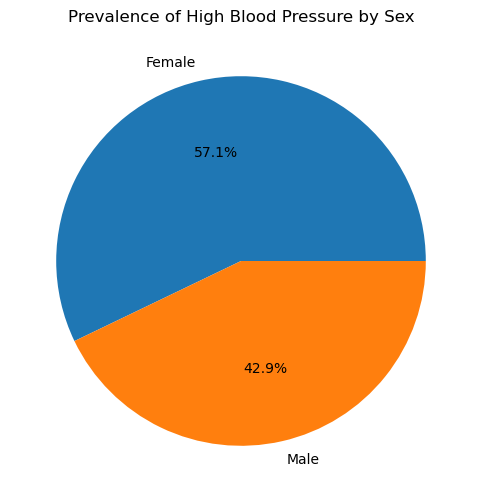

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(prevevalence_by_sex, labels=prevevalence_by_sex.index, autopct='%1.1f%%')
plt.title('Prevalence of High Blood Pressure by Sex')
plt.show()

----------
7. What is the relationship between smoking habits and the occurrence of heart failure?

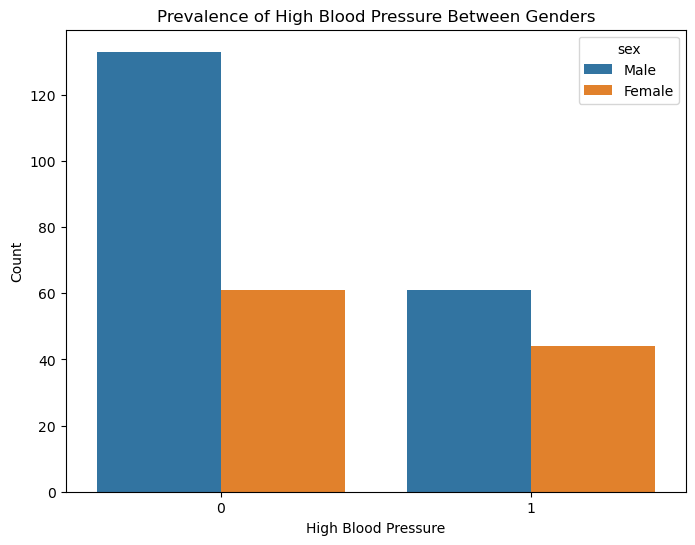

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='high_blood_pressure', hue='sex')
plt.title('Prevalence of High Blood Pressure Between Genders')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.show()

In [18]:
smoking_by_death = data.groupby('smoking')['DEATH_EVENT'].mean()
print(smoking_by_death)

smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64


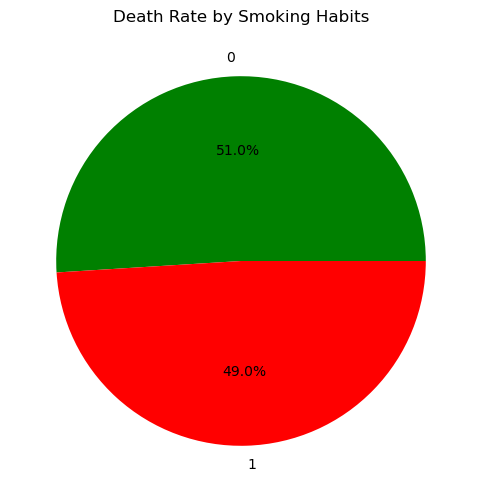

In [19]:
plt.figure(figsize=(8, 6))
plt.pie(smoking_by_death, labels=smoking_by_death.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Death Rate by Smoking Habits')
plt.show()

------------
8. Are there any noticeable patterns in the distribution of death events across different age groups?

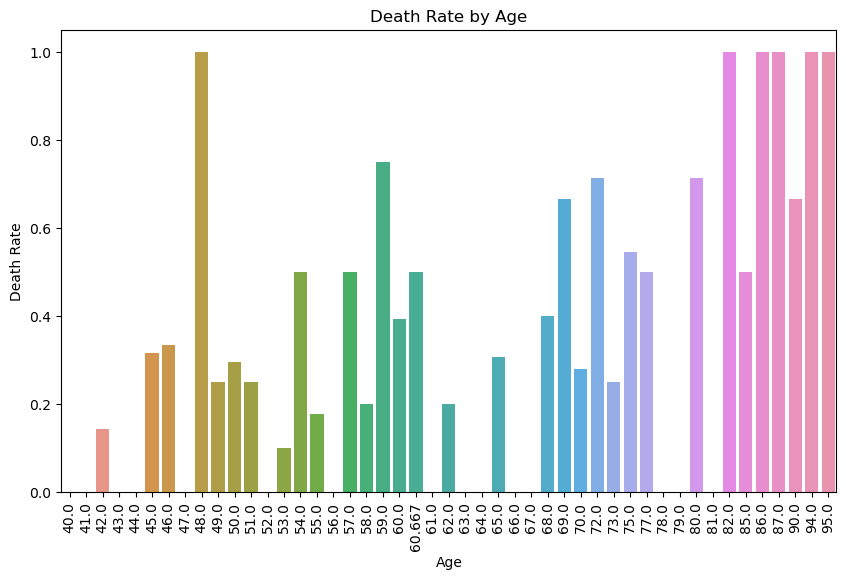

In [20]:
death_rate = data.groupby('age')['DEATH_EVENT'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=death_rate.index, y=death_rate.values)
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.title('Death Rate by Age')
plt.xticks(rotation=90)
plt.show()

----------
9. Is there any significant difference in ejection fraction between patients with and without diabetes?

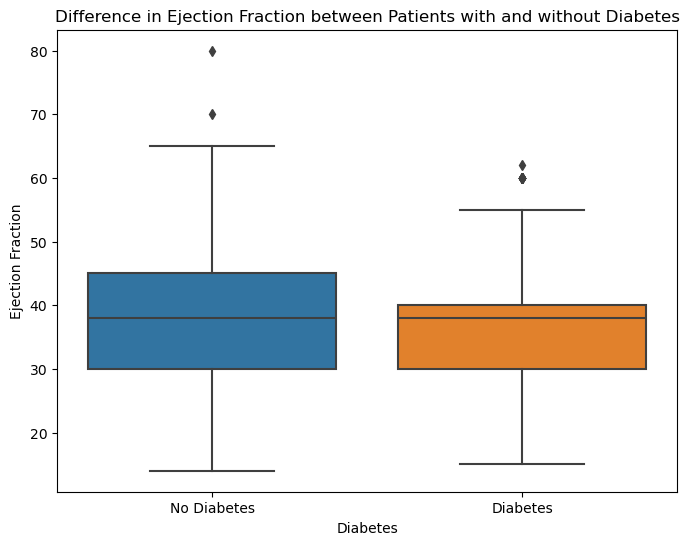

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=data)
plt.xlabel('Diabetes')
plt.ylabel('Ejection Fraction')
plt.title('Difference in Ejection Fraction between Patients with and without Diabetes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

-------------
10. How does the serum creatinine level vary between patients who survived and those who did not?

In [22]:
serum_creatinine = data.groupby('DEATH_EVENT')['serum_creatinine'].describe()

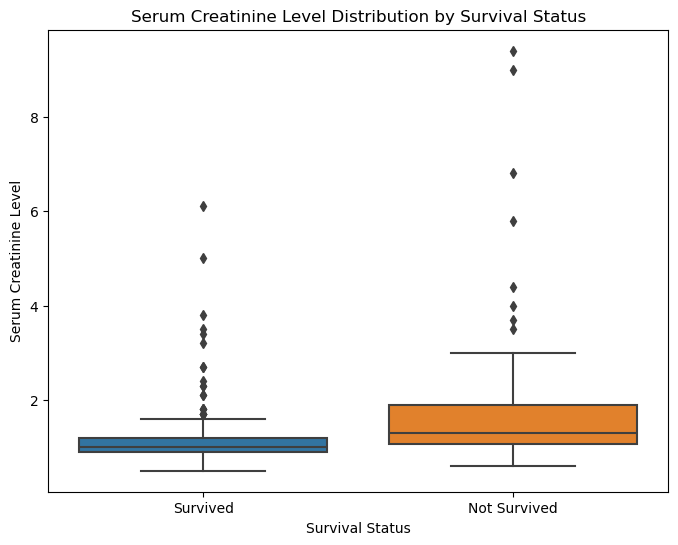

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.xlabel('Survival Status')
plt.ylabel('Serum Creatinine Level')
plt.title('Serum Creatinine Level Distribution by Survival Status')
plt.xticks([0, 1], ['Survived', 'Not Survived'])
plt.show()